In [21]:
# imports
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [9]:
yelp_df = pd.read_csv('/Users/parkerharalds/Documents/Lighthouse/Statistical_Modelling_Project/data/yelp_df.csv')
bikes_df = pd.read_csv('/Users/parkerharalds/Documents/Lighthouse/Statistical_Modelling_Project/data/city_bikes.csv')

In [ ]:
yelp_df.head(2)
bikes_df.head(2)

In [11]:
#renaming station_id column for merge
bikes_df = bikes_df.rename(columns={'station_id': 'station'})

In [13]:
main_df = pd.merge(bikes_df,yelp_df,on='station')

In [19]:
#checking shape of main_df against shape of original dataframes.
print('',main_df.shape,'\n',yelp_df.shape,'\n',bikes_df.shape)

 (3864, 36) 
 (3864, 30) 
 (258, 7)


In [38]:
#dropping city as it is redundant
main_df2 = main_df.drop(['city'],axis=1)
#check shape after dropping column
main_df2.shape
main_df = main_df2

In [40]:
#getting an idea of columns in full df
main_df.columns

Index(['station', 'station_name', 'latitude', 'longitude', 'free_bikes',
       'empty_slots', 'id', 'alias', 'name', 'image_url', 'is_closed', 'url',
       'review_count', 'categories', 'rating', 'transactions', 'phone',
       'display_phone', 'distance', 'business_hours', 'coordinates.latitude',
       'coordinates.longitude', 'location.address1', 'location.address2',
       'location.address3', 'location.city', 'location.zip_code',
       'location.country', 'location.state', 'location.display_address',
       'attributes.business_temp_closed', 'attributes.menu_url',
       'attributes.open24_hours', 'attributes.waitlist_reservation', 'price'],
      dtype='object')

In [43]:
#dropping many columns as they do not seem relevant
to_drop = main_df.columns[19:35]
main_df3 = main_df.drop(to_drop,axis=1)

In [49]:
drop_again = ['alias','image_url','is_closed','url','phone','display_phone']
#forgot one
drop_me = ['categories']
main_df3 = main_df3.drop(drop_me, axis=1)


In [50]:
main_df3.head(3)

,station,station_name,latitude,longitude,free_bikes,empty_slots,id,name,review_count,rating,transactions,distance
0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,11,7,nFxhMiWh2JRfaWW79aj66A,Café Portrait,74.0,4.4,[],423.473619
1,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,11,7,vZkovAEB5N5l1ZtS6aVDnA,Breka Bakery & Cafe,370.0,3.9,[],1199.915982
2,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,11,7,h1vHMq39YhDrxzpwBPelOA,Breka Bakery and Cafe,28.0,3.8,[],350.540969


As I am going to look into if there is a correlation between the number of bikes and the number of cafes, I decided to drop many columns from the main_df. This could have been done earlier when making the api calls; however, I decided I would like to grab more data than I need at this time from those calls. That way I can practice with the data in the future

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

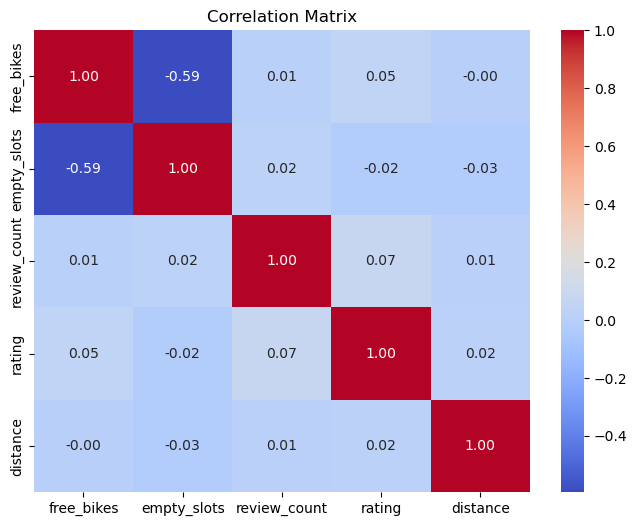

In [32]:
corr_matrix = num_main_df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.